# Project 7 -- Lukas Anell

In [1]:
# /anvil/projects/tdm/data/youtube/most_subscribed_youtube_channels.csv
# /anvil/projects/tdm/data/spotify/taylor_swift_discography_updated.csv

## Question 1

In [1]:
library(data.table)
youtubers <- read.csv("/anvil/projects/tdm/data/youtube/most_subscribed_youtube_channels.csv")
youtubers$video.count2 <- as.numeric(gsub(",", "", youtubers$video.count))
head(youtubers)

,rank,Youtuber,subscribers,video.views,video.count,category,started,video.count2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006,17317
2,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015,0
3,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006,786
4,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006,91271
5,5,Music,"116,000,000",0,0,,2013,0
6,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010,4497


In [2]:
category_counts <- tapply(youtubers$video.count2, youtubers$category, sum, na.rm = TRUE)
category_counts

Autos & Vehicles                Comedy 
                11230                  2874                 93562 
            Education         Entertainment      Film & Animation 
               124727               2674176                133319 
               Gaming         Howto & Style                Movies 
               427292                 81419                  5576 
                Music       News & Politics Nonprofits & Activism 
               510337               2754693                188445 
       People & Blogs        Pets & Animals  Science & Technology 
              1045091                 23960                 36622 
                Shows                Sports              Trailers 
               283027                140464                 13613 
      Travel & Events 
                  632

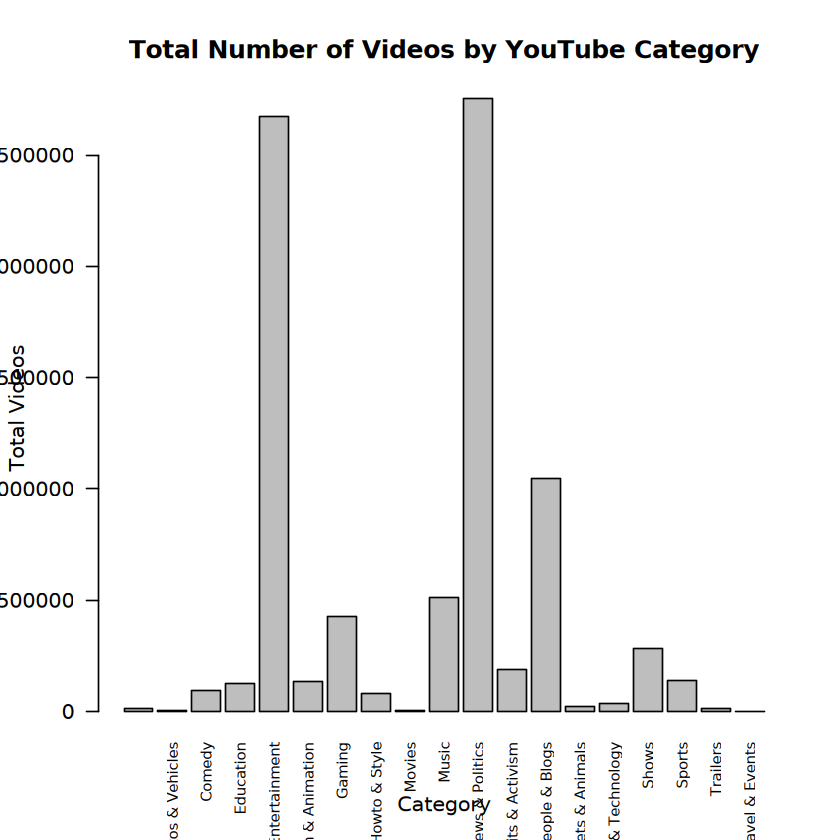

In [3]:
barplot(
    category_counts,
    main = "Total Number of Videos by YouTube Category",
    xlab = "Category",
    ylab = "Total Videos",
    las = 2,
    cex.names = 0.7
)

In [4]:
gamingMusic_channels <- subset(youtubers, category %in% c("Gaming", "Music"))
category_started_totals <- tapply(
    gamingMusic_channels$video.count2,
    list(gamingMusic_channels$category, gamingMusic_channels$started),
    sum,
    na.rm = TRUE
)
category_started_totals

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gaming,17878,163116,11967,16356,15342,9998,27421,72858,32267,31332,7342,7903,9302,2952,1126,132
Music,1446,36423,51621,33451,16392,31766,89353,44299,71681,119692,5447,8477,156,121,12,NA


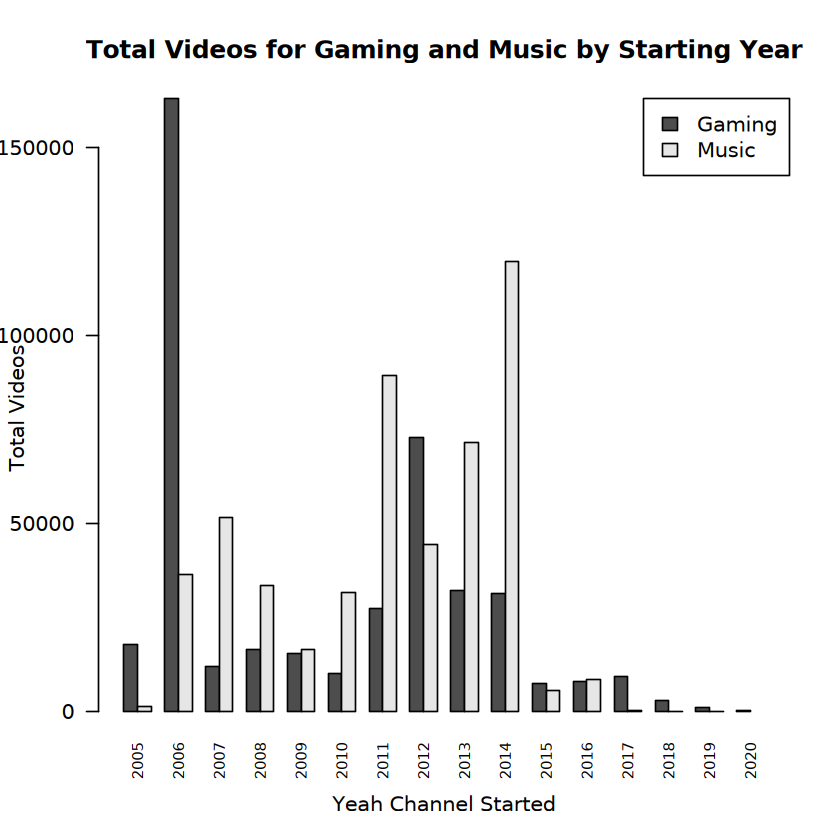

In [5]:
barplot(
    category_started_totals,
    beside = TRUE,
    main = "Total Videos for Gaming and Music by Starting Year",
    xlab = "Yeah Channel Started",
    ylab = "Total Videos",
    las = 2,
    cex.names = 0.7,
    legend.text = rownames(category_started_totals),
    args.legend = list(x = "topright")
)

In [6]:
average_by_year <- tapply(youtubers$video.count2, youtubers$started, mean, na.rm = TRUE)
average_by_year

1970      2005      2006      2007      2008      2009      2010      2011 
  540.000 15480.409 16612.625 24476.800 14807.333 10564.381  9957.319  5772.118 
     2012      2013      2014      2015      2016      2017      2018      2019 
 7142.812  7368.140  8370.807  4237.699  2594.442  5168.783  6515.543  2673.560 
     2020      2021 
 1385.000   696.750

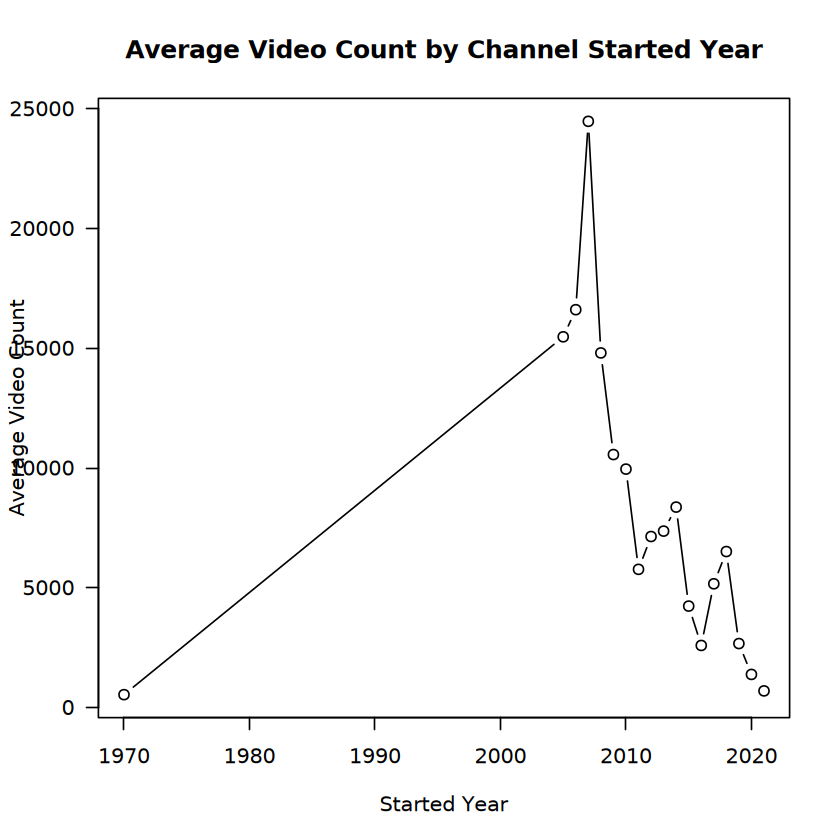

In [11]:
years_numeric <- as.numeric(names(average_by_year))
plot(
    years_numeric, average_by_year,
    type = "b",
    main = "Average Video Count by Channel Started Year",
    xlab = "Started Year",
    ylab = "Average Video Count",
    las = 1
)

I'm not sure if we've seen this before, but I noticed that the column "Video Count" in the table had to be addressed as `video.count` because of the space, so I thought that was interesting. Another thing, when I created the column `video.count2`, I wonder if it created the column as "Vdieo Count2" or if it stayed as "video.count2".
When looking at the dataset, it's pretty cool seeing these old channels I remember "fighting" for the #1 spot as the most subscribed, it feels like it's been so long since then.
It's pretty crazy how many more videos have been created in the "Entertainment" and "News & Politics" categories than any other category.
I also thought it was interesting how the most videos for gaming were created by channels made in 2006, I'm assuming that's because YouTube just came out and a lot of people, adults and kids, were trying it out. For the spike in music in 2014, I'm assuming it's because of growing popularity of music videos or streaming music?
In the last plot, I thought it was interesting how the average video count has gone down a lot, probably because now there's a lot more channels that don't get any views than there were before.

1.1: `News & Politics` had the most total videos.

1.2: `2006` went on to produce the most videos.

1.3: The average video count for a channel made in 2008 was `14807.33`.

## Question 2

In [55]:
ts_songs <- as.data.frame(fread("/anvil/projects/tdm/data/spotify/taylor_swift_discography_updated.csv"))
dim(ts_songs)

[1] 577  28

In [72]:
ts_songs <- ts_songs[ , !(names(ts_songs) %in% "track_lyrics")]
head(ts_songs)

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,Fortnight (feat. Post Malone),Synth Pop,Single,228965,Post Malone,No,0,648525069,1,The Tortured Poets Department: The Anthology,1,Pop,Compilation/Deluxe,19/4/2024,0,Complicated love/Looking for love,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,1.53e-05,0.0961,-10.976,0.0308,192.004,0.281,648525069,648525069
2,1,The Tortured Poets Department,Synth Pop,B-Side,293048,No,No,0,206954130,6,The Tortured Poets Department: The Anthology,2,Pop,Compilation/Deluxe,19/4/2024,0,Complicated love/Looking for love,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.0,0.1260,-8.441,0.0255,110.259,0.292,206954130,206954130
3,2,My Boy Only Breaks His Favorite Toys,Synth Pop,B-Side,203801,No,No,0,238016975,7,The Tortured Poets Department: The Anthology,3,Pop,Compilation/Deluxe,19/4/2024,0,Broken heart/Sadness,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.0,0.3020,-7.362,0.0269,97.073,0.481,238016975,238016975
4,3,Down Bad,R&B,B-Side,261228,No,No,0,318375377,2,The Tortured Poets Department: The Anthology,4,Pop,Compilation/Deluxe,19/4/2024,0,Broken heart/Sadness,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,"1,00E-06",0.0946,-10.412,0.0748,159.707,0.168,318375377,318375377
5,4,"So Long, London",Synth Pop,B-Side,262974,No,No,0,253712712,4,The Tortured Poets Department: The Anthology,5,Pop,Compilation/Deluxe,19/4/2024,0,Broken heart/Sadness,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.00264,0.0816,-11.388,0.3220,160.218,0.248,253712712,253712712
6,5,But Daddy I Love Him,Pop Rock,B-Side,340428,No,No,0,229410536,9,The Tortured Poets Department: The Anthology,6,Pop,Compilation/Deluxe,19/4/2024,0,Complicated love/Looking for love,spotify:track:4QMgEffJQuKtjCNvqfRZ0m,0.3840,0.521,0.720,0.0,0.1350,-7.684,0.1040,79.943,0.438,229410536,229410536


In [57]:
options(repr.matrix.max.cols = 50, repr.matrix.max.rows = 200)
ts_songs$energy <- as.numeric(ts_songs$energy)
summary(ts_songs$energy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1180  0.4170  0.5700  0.5649  0.7200  0.9500 

In [58]:
find_songs_with_energy <- function(input_df, threshold) {
  my_output <- input_df[input_df$energy >= threshold, ]
  return(my_output)
}

In [59]:
high_energy_df <- find_songs_with_energy(ts_songs, 0.5700)
nrow(high_energy_df)

[1] 289

In [60]:
find_songs_by_album <- function(input_df, album_name) {
  my_output <- input_df[input_df$album == album_name, ]
  return(my_output)
}

In [61]:
anthology_songs <- find_songs_by_album(ts_songs, "The Tortured Poets Department: The Anthology")
nrow(anthology_songs)

[1] 31

I wonder how energy is calculated. I'm sure it's not that important, but I'm curious anyway.
This is an obvious feature of any programming language, but I really like how easy and convenient functions are. Another thing, the way functions are declared feels similar to JavaScript I believe? The way you assign it to a variable name that you can reference instead of something like Python or Java where you have function headers.

2.1: The max was 0.9500, and the min was 0.1180

2.2: 289 songs had high energy. If I understood the instructions correctly, it should be how many rows are in the high_energy_df after the function has been applied.

2.3: See line 29

## Question 3

In [62]:
ts_songs$numeric_streams <- as.numeric(ts_songs$spotify_streams)

Warning message:
"NAs introduced by coercion"


In [63]:
bad_values <- ts_songs[is.na(ts_songs$numeric_streams) & !is.na(ts_songs$spotify_streams), "spotify_streams"]
head(bad_values)

[1] "102.221.045" "151.282.408" "182.418.311" "118.458.965" "88.205.974" 
[6] "101.800.187"

In [64]:
ts_songs$cleaned_streams <- gsub("\\.", "", ts_songs$spotify_streams)

In [65]:
ts_songs$numeric_streams <- as.numeric(ts_songs$cleaned_streams)

In [66]:
evermore <- find_songs_by_album(ts_songs, "evermore (deluxe version)")
head(evermore)

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
225,224,willow,Indie Folk,Single,214706,No,No,0,814.114.651,1,evermore (deluxe version),1,Indie Folk,Compilation/Deluxe,7/1/2021,0,New love,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,0.833,0.392,0.574,0.00179,0.1450,-9.195,0.1700,81.112,0.529,814114651,814114651
226,225,champagne problems,Indie Folk,B-Side,244000,No,No,0,588.394.719,10,evermore (deluxe version),2,Indie Folk,Compilation/Deluxe,7/1/2021,0,Broken heart/Sadness,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,0.920,0.462,0.240,0.0,0.1130,-12.077,0.0377,171.319,0.320,588394719,588394719
227,226,gold rush,Indie Pop,B-Side,185320,No,No,0,279.044.935,19,evermore (deluxe version),3,Indie Folk,Compilation/Deluxe,7/1/2021,0,Complicated love/Looking for love,spotify:track:3Dby3p1m6IOZn2gIIqECgK,0.830,0.512,0.462,0.166,0.1210,-10.491,0.0408,112.050,0.353,279044935,279044935
228,227,tis the damn season,Indie Folk,B-Side,229840,No,No,0,260.055.245,6,evermore (deluxe version),4,Indie Folk,Compilation/Deluxe,7/1/2021,0,Complicated love/Looking for love,spotify:track:6sQckd3Z8NPxVVKUnavY1F,0.735,0.575,0.434,6.59e-05,0.1050,-8.193,0.0312,145.916,0.348,260055245,260055245
229,228,tolerate it,Indie Folk,B-Side,245440,No,No,0,297.807.837,24,evermore (deluxe version),5,Indie Folk,Compilation/Deluxe,7/1/2021,0,Broken heart/Sadness,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,0.878,0.316,0.361,2.67e-05,0.0797,-10.381,0.0488,74.952,0.221,297807837,297807837
230,229,"no body, no crime (feat. HAIM)",Indie Rock,Single,215626,HAIM,No,0,266.696.518,5,evermore (deluxe version),6,Indie Folk,Compilation/Deluxe,7/1/2021,0,Betrayal/Anger,spotify:track:6uwfVkaOM1mcMkFmSn35ix,0.418,0.546,0.613,0.0,0.1030,-7.589,0.0264,79.015,0.535,266696518,266696518


In [67]:
nrow(evermore)

[1] 17

I noticed after replacing `numeric_streams` with the fixed version, that one time where I had put it in a separate column stayed in the data, even though I re-ran my code for cleaning it. Maybe it's because I didn't re-make the dataframe itself, so it just stayed.
I didn't know gsub could take regex as an argument, that's very nice and I learned about it through the article linked on the instructions.

3.1: It couldn't be immediately converted because some of the entries used '.' as digit separators, and I guess as.numeric couldn't convert that.

3.2: There were 17 songs on evermore (deluxe version)

## Question 4

In [80]:
ts_1989 <- find_songs_by_album(ts_songs, "1989 (Taylor's Version) [Deluxe]")
dim(ts_1989)

[1] 22 29

In [81]:
head(ts_1989)

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
48,47,Welcome To New York (Taylor's Version),Dance Pop,B-Side,212600,No,No,0,102.221.045,6,1989 (Taylor's Version) [Deluxe],1,Pop,Compilation/Deluxe,27/10/2023,0,Happiness,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,3.66e-05,0.3670,-4.840,0.0327,116.998,0.685,102221045,102221045
49,48,Blank Space (Taylor's Version),Electropop,B-Side,231833,No,No,0,151.282.408,3,1989 (Taylor's Version) [Deluxe],2,Pop,Compilation/Deluxe,27/10/2023,0,New love,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.0,0.1680,-5.376,0.0670,96.057,0.701,151282408,151282408
50,49,Style (Taylor's Version),Synth Pop,B-Side,231000,No,No,0,182.418.311,1,1989 (Taylor's Version) [Deluxe],3,Pop,Compilation/Deluxe,27/10/2023,0,New love,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.0197,0.0899,-4.785,0.0397,94.868,0.305,182418311,182418311
51,50,Out Of The Woods (Taylor's Version),Synth Pop,B-Side,235800,No,No,0,118.458.965,8,1989 (Taylor's Version) [Deluxe],4,Pop,Compilation/Deluxe,27/10/2023,0,Complicated love/Losing love,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,5.59e-05,0.3850,-5.968,0.0447,92.021,0.206,118458965,118458965
52,51,All You Had To Do Was Stay (Taylor's Version),Synth Pop,B-Side,193289,No,No,0,88.205.974,10,1989 (Taylor's Version) [Deluxe],5,Pop,Compilation/Deluxe,27/10/2023,0,Broken heart/Anger,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.0,0.1310,-5.579,0.0317,96.997,0.520,88205974,88205974
53,52,Shake It Off (Taylor's Version),Dance Pop,B-Side,219209,No,No,0,101.800.187,11,1989 (Taylor's Version) [Deluxe],6,Pop,Compilation/Deluxe,27/10/2023,0,Happiness,spotify:track:50yNTF0Od55qnHLxYsA5Pw,0.012100,0.636,0.808,2.18e-05,0.3590,-5.693,0.0729,160.058,0.917,101800187,101800187


In [86]:
convert_duration <- function(input_df) {
  input_df$duration_sec <- input_df$duration_ms / 1000
  input_df$duration_min <- input_df$duration_sec / 60

  return(input_df)
}

In [88]:
ts_1989 <- convert_duration(ts_1989)
head(ts_1989)

,ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams,duration_sec,duration_min
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
48,47,Welcome To New York (Taylor's Version),Dance Pop,B-Side,212600,No,No,0,102.221.045,6,1989 (Taylor's Version) [Deluxe],1,Pop,Compilation/Deluxe,27/10/2023,0,Happiness,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,3.66e-05,0.3670,-4.840,0.0327,116.998,0.685,102221045,102221045,212.600,3.543333
49,48,Blank Space (Taylor's Version),Electropop,B-Side,231833,No,No,0,151.282.408,3,1989 (Taylor's Version) [Deluxe],2,Pop,Compilation/Deluxe,27/10/2023,0,New love,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.0,0.1680,-5.376,0.0670,96.057,0.701,151282408,151282408,231.833,3.863883
50,49,Style (Taylor's Version),Synth Pop,B-Side,231000,No,No,0,182.418.311,1,1989 (Taylor's Version) [Deluxe],3,Pop,Compilation/Deluxe,27/10/2023,0,New love,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.0197,0.0899,-4.785,0.0397,94.868,0.305,182418311,182418311,231.000,3.850000
51,50,Out Of The Woods (Taylor's Version),Synth Pop,B-Side,235800,No,No,0,118.458.965,8,1989 (Taylor's Version) [Deluxe],4,Pop,Compilation/Deluxe,27/10/2023,0,Complicated love/Losing love,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,5.59e-05,0.3850,-5.968,0.0447,92.021,0.206,118458965,118458965,235.800,3.930000
52,51,All You Had To Do Was Stay (Taylor's Version),Synth Pop,B-Side,193289,No,No,0,88.205.974,10,1989 (Taylor's Version) [Deluxe],5,Pop,Compilation/Deluxe,27/10/2023,0,Broken heart/Anger,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.0,0.1310,-5.579,0.0317,96.997,0.520,88205974,88205974,193.289,3.221483
53,52,Shake It Off (Taylor's Version),Dance Pop,B-Side,219209,No,No,0,101.800.187,11,1989 (Taylor's Version) [Deluxe],6,Pop,Compilation/Deluxe,27/10/2023,0,Happiness,spotify:track:50yNTF0Od55qnHLxYsA5Pw,0.012100,0.636,0.808,2.18e-05,0.3590,-5.693,0.0729,160.058,0.917,101800187,101800187,219.209,3.653483


In the first step, I'm initially getting that there are 0 songs on the album. I didn't type it wrong so maybe my function isn't working. I checked the ts_songs dataframe and there's definitely one's from that album on there, so I'm going to copy the name from the table and try using that instead. Found the problem. Looks like the instructions say the name has a `’`, but the ones in the dataframe use `'`. That should definitely be fixed.

4.1: See line 81

4.2: See line 85

## Question 5

In [96]:
youtubers$subscribers2 <- as.numeric(gsub(",", "", youtubers$subscribers))
head(youtubers$subscribers2)

[1] 2.22e+08 1.54e+08 1.40e+08 1.39e+08 1.16e+08 1.11e+08

In [93]:
find_top_youtuber_by_genre <- function(input_df, genre) {
  genre_rows <- input_df[input_df$category == genre, ]

  return(genre_rows[which.max(genre_rows$subscribers2), ])
}

In [94]:
find_top_youtuber_by_genre(youtubers, "Gaming")

,rank,Youtuber,subscribers,video.views,video.count,category,started,video.count2,subscribers2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
6,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010,4497,1.11e+08


In [95]:
find_top_youtuber_by_genre(youtubers, "Music")

,rank,Youtuber,subscribers,video.views,video.count,category,started,video.count2,subscribers2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006,17317,2.22e+08


I noticed that for gsub if it's a `,` I can use `\\` and nothing interchangeably, I'm assuming because commas don't need escape characters.
`which.max()` is a pretty standard `max()` function, but still very convenient that it returns the whole row.

5.1: See line 93

5.2: I used "Music", and saw that it was T-Series.

5.3: I think it's very different. I'm not sure what the top music channel is, it could definitely still be T-Series. I actually looked it up, and it seems like PewDiePie is still #1 for gaming, but the most subscribed channel list has definitely changed since then.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
